In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
hd = pd.read_csv('C:/Users/ASUS/Downloads/heart.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
print(df.isnull().sum())
df = df.dropna()
df['age'].fillna(df['age'].median(), inplace=True)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3848\3471653356.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [12]:
print(df.dtypes)
df['age'] = df['age'].astype(int)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [13]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()


Duplicate rows: 723


In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers.sum())
df = df[~outliers.any(axis=1)]


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [22]:

df['age'] = np.where(df['age'] < 0, df['age'].median(), df['age'])


In [23]:
# Check unique values for the 'gender' column (e.g., 1 and 2 instead of 0 and 1)
print(df['sex'].unique())

# Correct encoding (if 1=Male, 2=Female -> Convert to binary)
df['sex'] = df['sex'].replace({1: 0, 2: 1})


[1 0]


In [27]:
print(df['cp'].unique())
df['cp'] = df['cp']


[0 1 2 3]


In [28]:
df.to_csv('heart_cleaned.csv', index=False)
print("Data cleaned and saved successfully!")


Data cleaned and saved successfully!


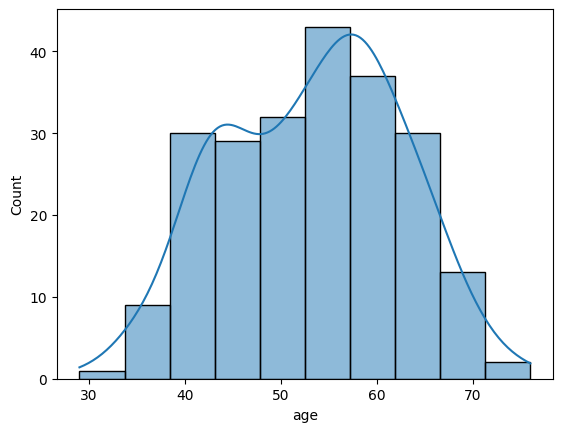

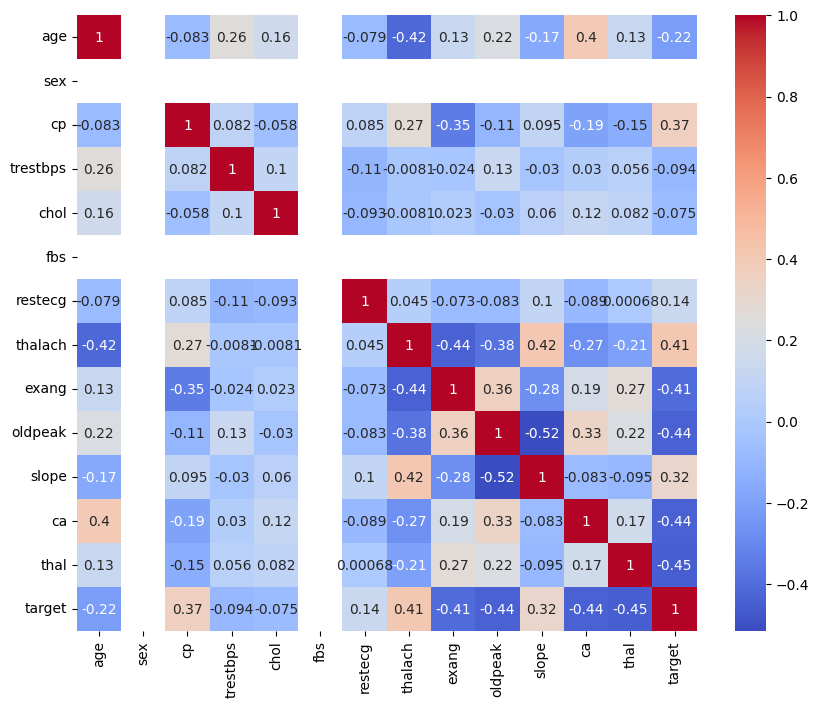

In [29]:
sns.histplot(df['age'], kde=True)
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
